<a href="https://colab.research.google.com/github/MaliniVibin1502/MachineLearning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Machne Learning project done on the Titanic dataset to predict if the passengers survived on not by entering gender and age details. Python packages used in this project arre Sckitlearn, Numpy, Pandas, seaborn and Tensorflow is used for the machine learning.



In [ ]:
!pip install -q sklearn

In [ ]:
!pip install future

In [ ]:
from __future__ import absolute_import, print_function, division, unicode_literals
from sklearn.model_selection import train_test_split


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
titanic= pd.read_csv("https://raw.githubusercontent.com/MaliniVibin1502/MachineLearning/main/Titanic/titanic.csv")
titanic.head()


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
x=titanic.drop(['survived'], axis=1)
y=titanic['survived']
x.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
x_train,x_eval,y_train,y_eval = train_test_split(x,y,test_size=0.30, random_state=21)

In [ ]:
y_train.head()

241    1
734    1
581    0
456    0
118    0
Name: survived, dtype: int64

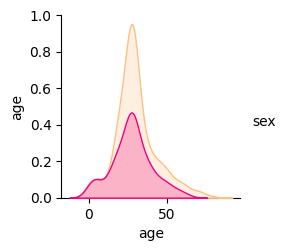

In [ ]:
gender_spec=x_train[['sex','age','alone']]
sb.pairplot(gender_spec, hue='sex', palette='Accent_r')

<Axes: >

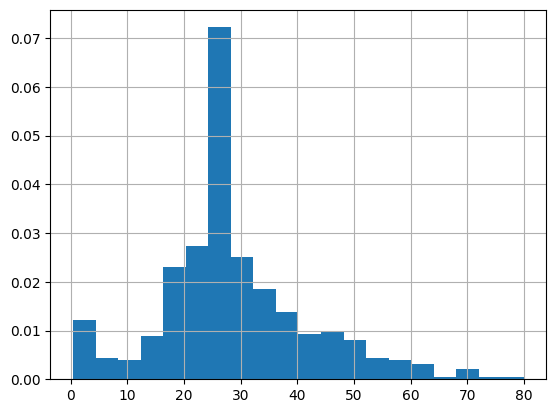

In [ ]:
x_train.age.hist(density = True, bins=20)

<Axes: >

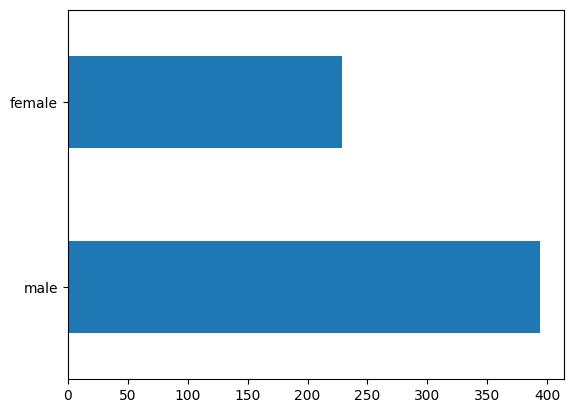

In [ ]:
x_train.sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% Survive')

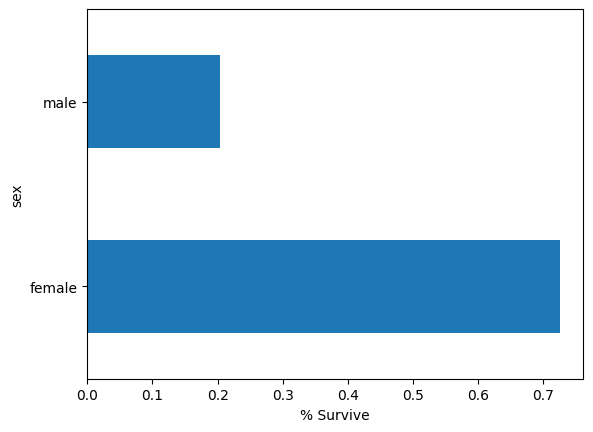

In [ ]:
pd.concat([x_train,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% Survive')

Detailed anlysis shows the below
- Majority of the passengers in Titanic are between the age 20 and 30
- There are more male passengers than female
- Majority of the passengers are in class 3
- Females have higher % survival rate than men

Now the categorical data, which are columns Name, Sex, Pclass, Ticket, Cabin and Embarked have to be convereted to numberical values

In [ ]:
CATEGORICAL_COLUMNS=['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
NUMERIC_COLUMNS=['age','fare']
feature_columns=[]
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = x_train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype= tf.float32))
  print(feature_columns)


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('female', 'male'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 5, 2, 4, 8, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 2, 4, 5, 1, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Third', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'D', 'B', 'E', 'F', 'G', 'A'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Queenstown', 'Cherbourg', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
x_train[feature_name].unique()

array([133.65  ,  52.    ,   6.95  ,  16.1   ,   8.6625,  10.5167,
         8.05  ,  46.9   ,   7.2292,   7.8542,  56.4958, 263.    ,
        21.6792,  31.3875,   7.7958,  77.2875,  39.6875,  69.3   ,
        10.5   ,   7.8958,  69.55  ,   7.775 ,   7.75  ,  57.9792,
        25.4667,   9.8417,   0.    ,  14.4583,   9.5   ,  35.5   ,
        13.    ,  12.2875,  79.2   ,   6.4958,  26.    ,  20.2125,
        24.15  ,   7.925 ,  31.275 ,  30.    ,  47.1   , 512.3292,
        76.7292,  61.3792,   7.225 ,   9.5875,   6.75  ,  29.125 ,
        28.5   ,  82.1708,  11.5   , 135.6333,  13.5   ,   7.8292,
        56.9292,  16.7   ,  73.5   ,   7.7292,  26.55  ,  24.    ,
        14.5   ,   6.975 ,  49.5042,  37.0042,  18.    ,  55.    ,
        22.3583,  25.9292, 227.525 ,  18.75  ,  21.    ,   7.25  ,
        66.6   ,   9.825 ,  36.75  ,   7.5208, 153.4625,  29.7   ,
        14.4542,  15.0458,  12.35  ,  65.    ,   8.5167,  27.9   ,
         7.7333,   8.85  ,   7.05  ,  15.5   ,   8.4333,   9.4

In [ ]:
x_train['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
def make_input_fn(data_titanic, label_titanic, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    dataset=tf.data.Dataset.from_tensor_slices((dict(data_titanic),label_titanic))
    if shuffle:
      dataset=dataset.shuffle(1000)
    dataset=dataset.batch(batch_size).repeat(num_epochs)
    return dataset
  return input_function

train_input_fn = make_input_fn(x_train, y_train)
eval_input_fn= make_input_fn(x_eval,y_eval,num_epochs=1, shuffle=False)


For this Machine Learning Model I am using the Linear regression model to estimate the survival rate of the passengers in the Titanic

In [ ]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)

In [ ]:
linear_est.train(train_input_fn)

In [ ]:
result=linear_est.evaluate(eval_input_fn)

In [ ]:
clear_output()

In [ ]:
print(result['accuracy'])

0.8395522


In [ ]:
print(result)

{'accuracy': 0.8395522, 'accuracy_baseline': 0.64179105, 'auc': 0.8756056, 'auc_precision_recall': 0.84783274, 'average_loss': 0.41630018, 'label/mean': 0.35820895, 'loss': 0.4171478, 'precision': 0.884058, 'prediction/mean': 0.2986849, 'recall': 0.6354167, 'global_step': 200}


In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(result[0])

{'logits': array([0.94861174], dtype=float32), 'logistic': array([0.7208359], dtype=float32), 'probabilities': array([0.27916408, 0.72083586], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}


Finding the probabilty of survived and not survived from the result

In [ ]:
print(result[0]['probabilities'])

[0.27916408 0.72083586]
